In [25]:
%run "! DEFAULT PLOT THINGIES.ipynb"
%run "../! DEFAULT PLOT THINGIES.ipynb"

from __future__ import division

ERROR: File `u'! DEFAULT PLOT THINGIES.ipynb.py'` not found.


<IPython.core.display.Javascript object>

Current working directory is now c:\users\deen\dropbox\phd rearrangements\thesis\notebooks\extremal-value-scaling-correlated-numerical
Populating the interactive namespace from numpy and matplotlib
Total # of packings: 

`%matplotlib` prevents importing * from pylab and numpy
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in absolute


 83006
After (1.1):  68835
After (1.2):  62274
After (1.3):  61146
After (2.1):  60226
After (2.2):  59838
(3):
   512 -6.5 skipped (only 7 packings)
   724 -7.0 skipped (only 19 packings)
   1024 -6.83 skipped (only 4 packings)
   1024 -6.67 skipped (only 10 packings)
   1024 -6.5 skipped (only 17 packings)
   1024 -6.33 skipped (only 16 packings)
   4096 -4.0 skipped (only 12 packings)
   4096 -3.0 skipped (only 13 packings)
   4096 -2.0 skipped (only 18 packings)
After (3):  59722


C:\Python27\lib\site-packages\IPython\kernel\__main__.py:15: RuntimeWarning: invalid value encountered in less
C:\Python27\lib\site-packages\IPython\kernel\__main__.py:19: RuntimeWarning: invalid value encountered in less


In [27]:
gammas = np.load(r"E:\PhD rearrangements\auto\linres_upps\N1024~P1e-2-gammas.npy") * 2

numpacks = len(glob.glob(r"E:\PhD rearrangements\auto\linres_upps\N1024~P1e-2\????.npy"))
print "N1024:", len(gammas)/numpacks
gammas = gammas[gammas<1e9]
print "N1024:", len(gammas)/numpacks

N1024: 2295.01549681
N1024: 1147.24703737


In [23]:
Nc = 1147
M = 1000

gammadist = np.percentile(gammas, 100/Nc)
print "%e" % gammadist

gammaccs = []
for i in range(100):
    # we now draw (M,Nc) samples out of gammas and calculate the gammabk from that
    samples = np.random.choice(gammas, (M,Nc))
    minima = np.amin(samples, axis=1)
    gammacc = np.mean(minima)
    gammaccs.append(gammacc)

print "%e %e" % (np.mean(gammaccs), np.std(gammaccs))
print "%e %e" % (np.mean(gammadist/gammaccs), np.std(gammadist/gammaccs))
    

1.407237e-04
1.343390e-04 3.828101e-06
1.048388e+00 3.028975e-02


gammadist =  0.000140723662798
1.05153262519 \pm 0.031918847015


(array([  5.,   4.,  10.,  11.,  19.,  12.,  18.,   8.,  11.,   2.]),
 array([ 0.97875085,  0.99291369,  1.00707653,  1.02123937,  1.0354022 ,
         1.04956504,  1.06372788,  1.07789072,  1.09205356,  1.1062164 ,
         1.12037923]),
 <a list of 10 Patch objects>)

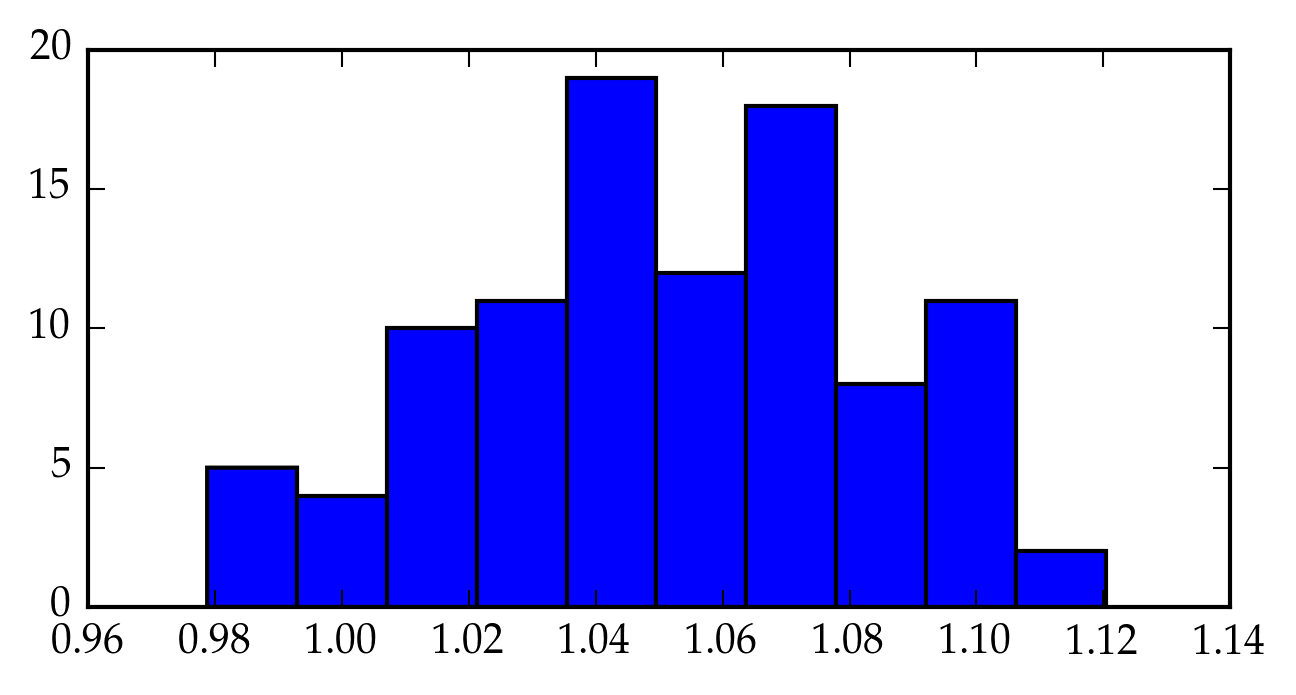

In [6]:
# before we start, simulate what deviation between gammadist and gammabk we expect
# they are equal for normal dist, but e.g. gammadist ~ 1.1 gammabk for lognormal

Nc = 1147
M = 1000 

gammadist = np.percentile(gammas, 100/Nc)

print "gammadist = ", gammadist

gammaccs = []

for i in range(100):
    # we now draw (M,Nc) samples out of gammas and calculate the gammabk from that
    samples = np.random.choice(gammas, (M,Nc))
    minima = np.amin(samples, axis=1)
    gammacc = np.mean(minima)
    gammaccs.append(gammacc)
    
gammaccs = np.array(gammaccs)
gammaccerror = gammadist/gammaccs

print np.mean(gammaccerror), r"\pm", np.std(gammaccerror)
plt.hist(gammaccerror)

0.000140722279227 1.451354e-04 0.969592757302
\includegraphics{notebooks/extremal-value-scaling-correlated-numerical/ensemble-gamma-cdf-plus-extremal-calculation.pdf}


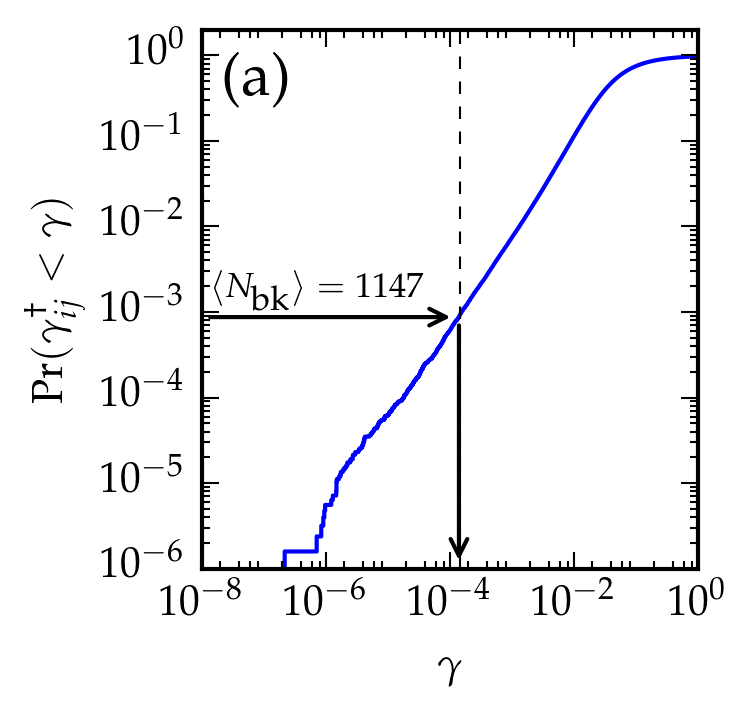

In [9]:
import cdf

f = halffig()

g = gammas

cdf.plot_cdf(g)
#cdf.plot_cdf(gammas2, linestyle=":", color="red")
loglog()

plt.xlabel(r"$\gamma$")
plt.ylabel(r"$\Pr(\gamma_{ij}^\dagger < \gamma)$", labelpad=3)
plt.axis(ymin=1e-6, ymax=2, xmin=1e-8, xmax=1)

plt.xticks([1e-8,1e-6,1e-4,1e-2,1e0])

xmin = 1e-8
ymin = 1e-6
# <Nc> = 2330
ywhere = 1/1147
xwhere = g[(len(g))*ywhere]

plt.annotate(s='',xy=( xwhere, ywhere), xytext=(xmin, ywhere), arrowprops={'arrowstyle': '->'})
plt.annotate(s='',xy=( xwhere, ymin), xytext=(xwhere, ywhere), arrowprops={'arrowstyle': '->'})

plt.text(xmin*1.5, ywhere*1.2, r"$\langle N_{\textrm{bk}}\rangle = 1147$", fontsize='small')

N = 1024; lP = -2
mask = (dataN == N) * (datalP == lP) #* (summ["N-_plus"] > 0) * (summ["N+_plus"] == 0)

sdata = summ[mask]

mn = mean(sdata["gbk_FQ_base"])

print xwhere, "%e" % mn, xwhere/mn

plt.axvline(mn, color='black', dashes=(3,3), lw=0.5)
subplotlabel('(a)')

x = np.logspace(-7,-1)
#plt.plot(x,10*x)
savefig('ensemble-gamma-cdf-plus-extremal-calculation.pdf')

# now we have to run this process for all (N,P). That's going to take a while...
# make sure to dump the values once we're done!
stopat = 100000
import pickle, glob, os, numpy as np
if True:
    values = {}
    samples = {}
    toti= 0

    for d in glob.glob(r"E:\PhD rearrangements\auto\linres_upps\N*~P*"):
        os.write(1, d + "\n")
        try:
                lp = d.split('\\')[-1]
                N,P = lp.split("~")
                N = int(N[1:])
                P = float(P[1] + "." + P[2:])
        except ValueError:
            continue
        
        if P >= 1e-1 or P<=1e-7:
            continue

        pathname = os.path.split(d)[1]
        allgammas = []
        i = 0
        Ns = []
        sources = []
        files = glob.glob(d + r"\????.npy")
        if len(files) < 30:
            continue

        for j,f in enumerate(files):
            if j > stopat:
                break

            if toti % 10 == 0:
                mem = ( process.get_memory_info()[0] / float(2 ** 20))
                os.write(1, "%i files processed, memory usage %i MB\n" % (toti, mem))
            toti += 1

            try:
                x=np.load(f)
            except Exception as e:
                os.write(1, "%s: %s\n" % (f, e))
                continue

            up = x.tolist()['u_par']
            delta = x.tolist()['deltas']

            mask = (delta > 0) * np.isfinite(up)
            Ns.append(np.sum(mask)/2)
            gammas = (delta[mask]) / (up[mask])
            allgammas.append(gammas)

        try:
            npallgammas = np.concatenate(allgammas)
        except ValueError as e:
            print d, e
            continue
        Nc_mean = np.mean(Ns)
        gammas = np.sort(npallgammas)[::2]
        gammas[gammas < 0] = 1e10
        gammas = gammas[np.isfinite(gammas) * (gammas > 1e-14)] # rattlers don't count
        gammas = np.sort(gammas)
        np.save(d + "-gammas.npy", gammas)
        os.write(1, "wrote %s-gammas.npy\n" % (d))
        gamma = gammas[(len(gammas))/Nc_mean]


        m = (dataN == N) * (datalP == round(log10(P),2))
        gmin = summ[m]["gamma_min"]
        exp_gamma = np.median(gmin[np.isfinite(gmin)])

        try:
            Nsamples = len(gammas)/np.where(gammas > exp_gamma)[0][0]
        except IndexError:
            Nsamples = np.nan

        values[d] = (N,P,gamma)
        samples[d] = (N,P,Nsamples)
        
        pickle.dump(values, open(r"E:\PhD rearrangements\gamma_vanuit_verdeling.pickle", "wb"))
        os.write(1, "wrote gamma_vanuit_verdeling.pickle\n")
        pickle.dump(samples, open(r"E:\PhD rearrangements\nsamples_vanuit_verdeling.pickle", "wb"))
        
    #pickle.dump(values, open('gamma_vanuit_verdeling.pickle', 'wb'))
    #pickle.dump(samples, open('nsamples_vanuit_verdeling.pickle', 'wb'))


In [29]:
import pickle
values = pickle.load(open(r'E:\PhD rearrangements\gamma_vanuit_verdeling.pickle', 'rb'))
samples = pickle.load(open(r'E:\PhD rearrangements\nsamples_vanuit_verdeling.pickle', 'rb'))

halffig()

ax1 = subplot(2,1,1)
subplots_adjust(hspace=0) 
setp(ax1.get_xticklabels(), visible=False)
subplotlabel('(b)')

ax2 = subplot(2,1,2,sharex=ax1)
subplotlabel('(c)')

Ns = unique(dataN)
lPs = unique(datalP)

smallvals = []

for k,(N,P,v) in values.items():
    lP = np.round(np.log10(P), 2)
    mask = (dataN == N) * (datalP == lP) * (summ["N-_plus"] > 0) * (summ["N+_plus"] == 0)

    if sum(mask) < 20 or \
       lP < -7 or \
       lP > -1.5:
        print 'skipping', N,lP
        continue

    sdata = summ[mask]
    kwargs  = NPmapper(N,P)
    kwargs['color'] = kwargs['mec'] = [0.6]*3

    mn = mean(sdata["gamma_min"])
    
    ax1.plot(N*N*P * np.log10(N)**(-0.7), N*N*mn, ms=2, marker="s", color='gray', mec='gray', zorder=-1)
    ax1.plot(N*N*P * np.log10(N)**(-0.7), N*N*v, ms=2, **NPmapper(N,P))

    ax2.plot(N*N*P * np.log10(N)**(-0.7), v/mn, ms=2, **NPmapper(N,P))
    
    if N*N*P * np.log10(N)**(-0.7) < 1e-2:
        smallvals.append(v/mn)
    
ax2.axhline(np.mean(smallvals), color="black", lw=0.5, zorder=-1)

ax1.loglog()
ax1.set_ylim([1e-5, 1e3])
ax1.set_yticks([1e-4,1e-2,1e0,1e2])
ax2.set_yticks([1e-3,1e-1,1e1], minor=True)
ax1.set_ylabel(r"$N^2\gamma$")

x = np.logspace(1,4)
ax1.plot(x, 0.1*sqrt(x), "k", lw=0.5)
ax1.text(10**2.5, 0.01*(0.1*10**2.5), "0.5", fontsize='xx-small', va="bottom")

ax2.semilogx()
ax2.set_ylim(0,1.1)
ax2.set_yticks([0,1])
ax2.set_yticks([0.2,0.4,0.6,0.8], minor=True)
ax2.set_ylabel(r'$\gamma^{\textrm{dist}}/\gamma^{\textrm{bk}}$')

ax2.set_xlim(1e-5, 1e5)
ax2.set_xticks([1e-4,1e-2,1e0,1e2,1e4])
ax2.set_xticks([], minor=True) #1e-5,1e-3,1e-1,1e1,1e3,1e5], minor=True)
ax2.set_xlabel(r"$N^2P\>\log_{10}(N)^{-0.7}$")
print np.mean(smallvals)
savefig('extremal-scaling-numeric.pdf')

skipping 1024 -6.33
skipping 1024 -6.67
skipping 512 -6.5
skipping 1024 -6.5
skipping 1024 -6.83
0.659461246542
\includegraphics{notebooks/extremal-value-scaling-correlated-numerical/extremal-scaling-vs-gammabkfq.pdf}


C:\Python27\lib\site-packages\matplotlib\scale.py:93: RuntimeWarning: invalid value encountered in less_equal
  mask = a <= 0.0


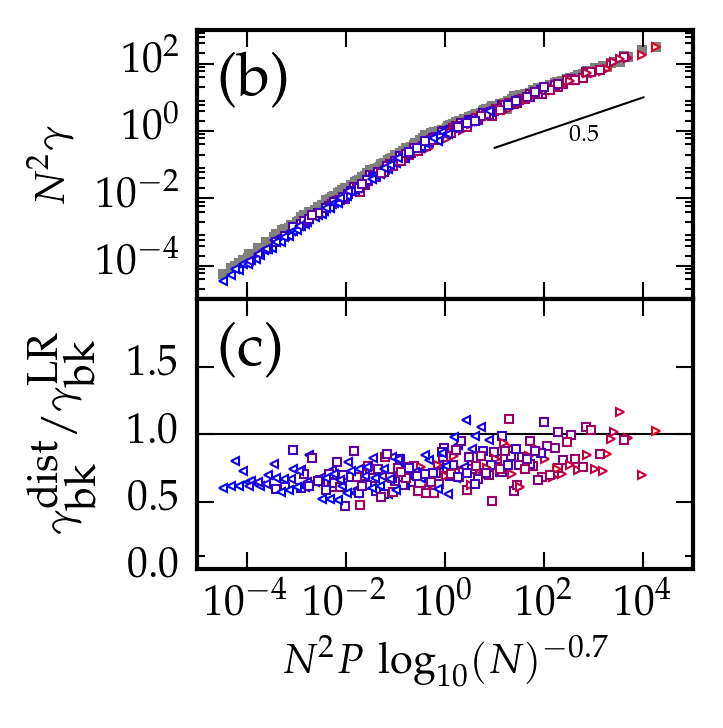

In [31]:
halffig()

ax1 = subplot(2,1,1)
subplots_adjust(hspace=0) 
setp(ax1.get_xticklabels(), visible=False)
subplotlabel('(b)')

ax2 = subplot(2,1,2,sharex=ax1)
subplotlabel('(c)')

Ns = unique(dataN)
lPs = unique(datalP)

smallvals = []

for k,(N,P,v) in values.items():
    v = v * 2 # andere strain-definitie
    
    lP = np.round(np.log10(P), 2)
    mask = (dataN == N) * (datalP == lP) #* (summ["N-_plus"] > 0) * (summ["N+_plus"] == 0)

    if sum(mask) < 20 or \
       lP < -7 or \
       lP > -1.5:
        print 'skipping', N,lP
        continue

    sdata = summ[mask]
    kwargs  = NPmapper(N,P)
    kwargs['color'] = kwargs['mec'] = [0.6]*3

    mn = mean(sdata["gbk_FQ_base"])
    
    ax1.plot(N*N*P * np.log10(N)**(-0.7), N*N*mn, ms=2, marker="s", color='gray', mec='gray', zorder=-1)
    ax1.plot(N*N*P * np.log10(N)**(-0.7), N*N*v, ms=2, **NPmapper(N,P))

    ax2.plot(N*N*P * np.log10(N)**(-0.7), v/mn, ms=2, **NPmapper(N,P))
    
    if N*N*P * np.log10(N)**(-0.7) < 1e-2:
        smallvals.append(v/mn)
        
    #mn = mean(sdata["gmk_FQ_base"])
    
    #ax1.plot(N*N*P * np.log10(N)**(-0.7), N*N*mn, ms=2, marker="s", color='gray', mec='gray', zorder=-1)
    #ax1.plot(N*N*P * np.log10(N)**(-0.7), N*N*v, ms=2, **NPmapper(N,P))
    
#ax2.axhline(np.nanmean(smallvals), color="black", lw=0.5, zorder=-1)
ax2.axhline(1, color="black", lw=0.5, zorder=-1)

ax1.loglog()
ax1.set_ylim([1e-5, 1e3])
ax1.set_yticks([1e-4,1e-2,1e0,1e2])
ax2.set_yticks([1e-3,1e-1,1e1], minor=True)
ax1.set_ylabel(r"$N^2\gamma$")

x = np.logspace(1,4)
ax1.plot(x, 0.1*sqrt(x), "k", lw=0.5)
ax1.text(10**2.5, 0.01*(0.1*10**2.5), "0.5", fontsize='xx-small', va="bottom")

ax2.semilogx()
ax2.set_ylim(0,2)
ax2.set_yticks([0,0.5,1,1.5])
#ax2.set_yticks([0.2,0.4,0.6,0.8], minor=True)
ax2.set_ylabel(r'$\gamma^{\textrm{dist}}_{\textrm{bk}}/\gamma^{\textrm{LR}}_{\textrm{bk}}$')

ax2.set_xlim(1e-5, 1e5)
ax2.set_xticks([1e-4,1e-2,1e0,1e2,1e4])
ax2.set_xticks([], minor=True) #1e-5,1e-3,1e-1,1e1,1e3,1e5], minor=True)
ax2.set_xlabel(r"$N^2P\>\log_{10}(N)^{-0.7}$")
print np.nanmean(smallvals)
savefig('extremal-scaling-vs-gammabkfq.pdf')